# Finding the Best Markets to Advertise In
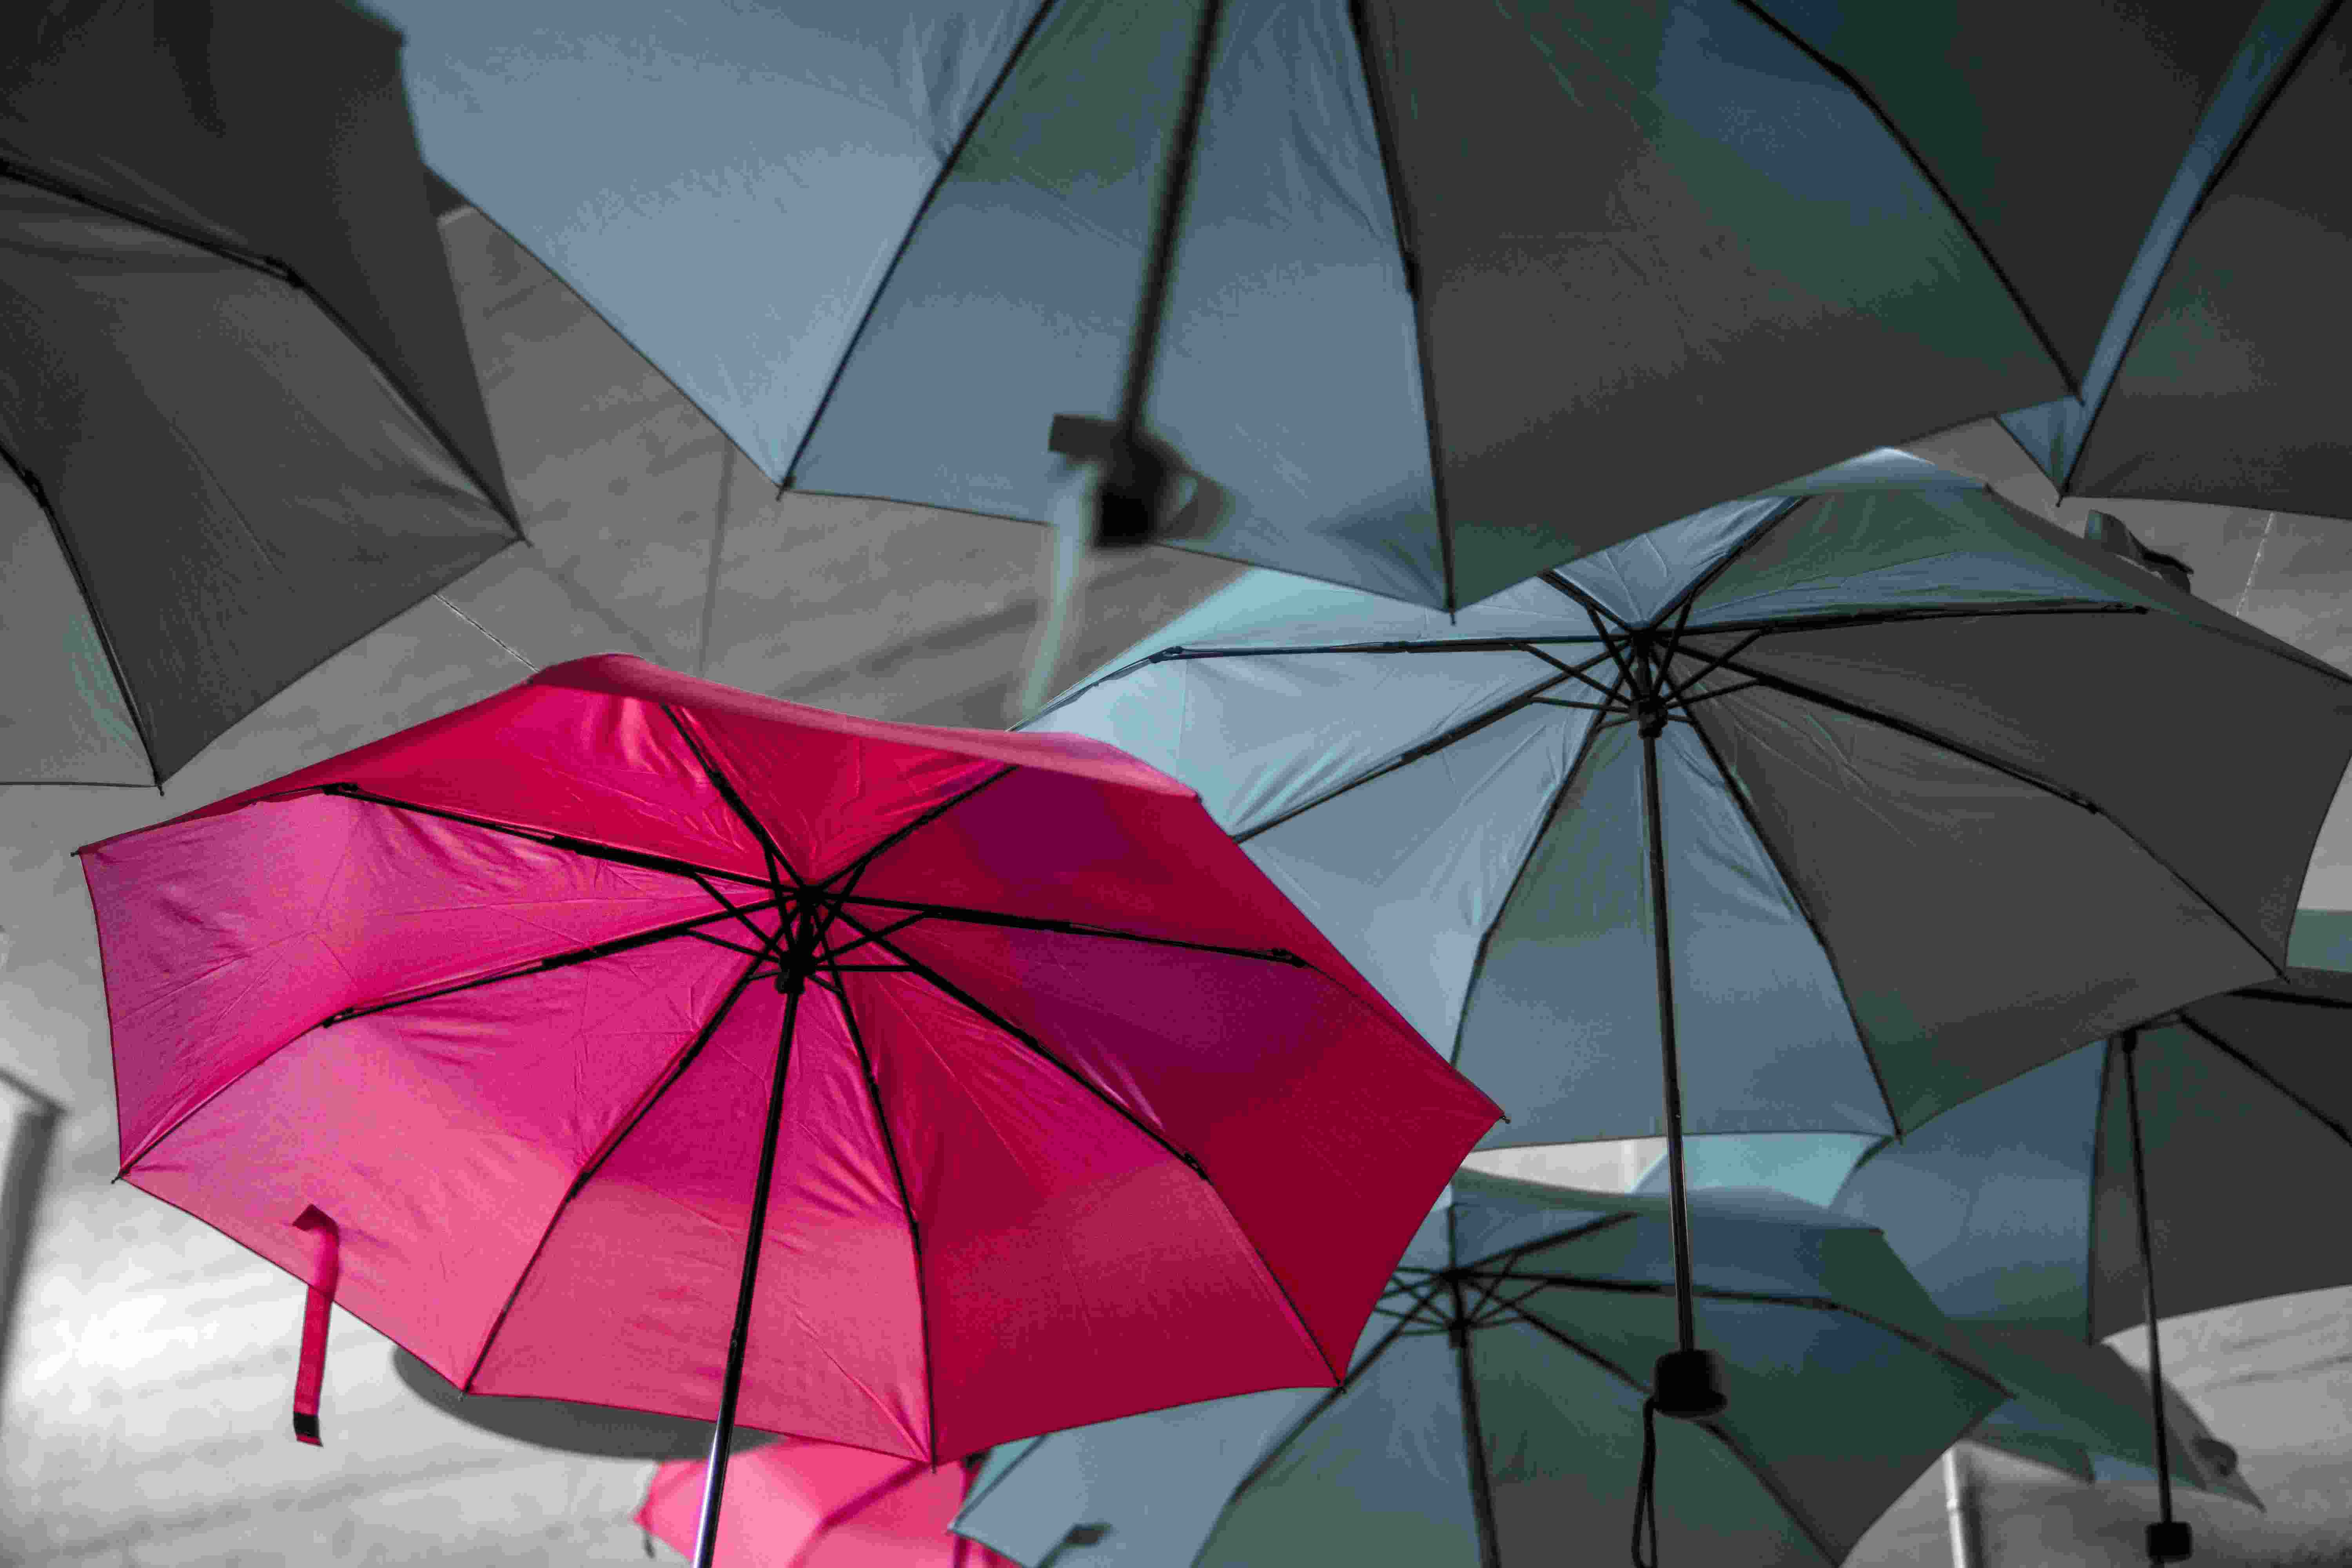
## Introduction
E-learning has recently become very popular, partly because of the overall international situation with COVID, partly because it has proved to be indeed a very efficient way of acquiring new information and mastering new skills. In addition, learning online often implies a flexible schedule, a high level of personal responsibility, involvement, creativity, community support when the student is stuck, and almost always lower prices compared to traditional courses.

The goal of this project is to find out the two best markets to advertise programming courses of an e-learning company. The wide range of content mostly includes web and mobile development, but also data science, game development, etc. The main point is to promote the company's educational product, so for this purpose, we'd like to invest some money in advertisement. 

### Summary of Results
The main market for our ads are the USA, followed with a big gap by India. The advertising budget should be divided between them proportionally to the percentage of potential clients (91% and 9%), or totally assigned to the USA.  By age, our target audience is people in their 20s-30s.

## Data Understanding
To reach our goal, we could organize surveys for a couple of different markets to find out which would be the best choices for advertising. However, this approach is very expensive, so let's consider cheaper options first.

As a workaround, we can try to use existing surveys that might be relevant for our purpose. For example, the one from a free web development learning platform [freeCodeCamp](https://www.freecodecamp.org) conducted in May 2017 – [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/) – could be an ideal candidate for our purposes, since they run a popular Medium publication with 400,000+ followers and attract a lot of new coders with various interests. 

The survey data is publicly available and can be downloaded [here](https://github.com/freeCodeCamp/2017-new-coder-survey). Let's import all the necessary libraries, read the data and make some initial exploration:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

fcc = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
fcc.shape

(18175, 136)

The dataset has 18175 rows and 136 columns.

In [2]:
# Avoiding truncated output
pd.options.display.max_columns = 150
fcc.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [3]:
round(fcc.isnull().sum()*100/len(fcc),0)

Age                    15.0
AttendedBootcamp        3.0
BootcampFinish         94.0
BootcampLoanYesNo      94.0
BootcampName           95.0
                       ... 
YouTubeMIT             82.0
YouTubeMozillaHacks    97.0
YouTubeOther           93.0
YouTubeSimplilearn     99.0
YouTubeTheNewBoston    84.0
Length: 136, dtype: float64

It seems that there are many columns with a very high percent of null values:

<AxesSubplot:>

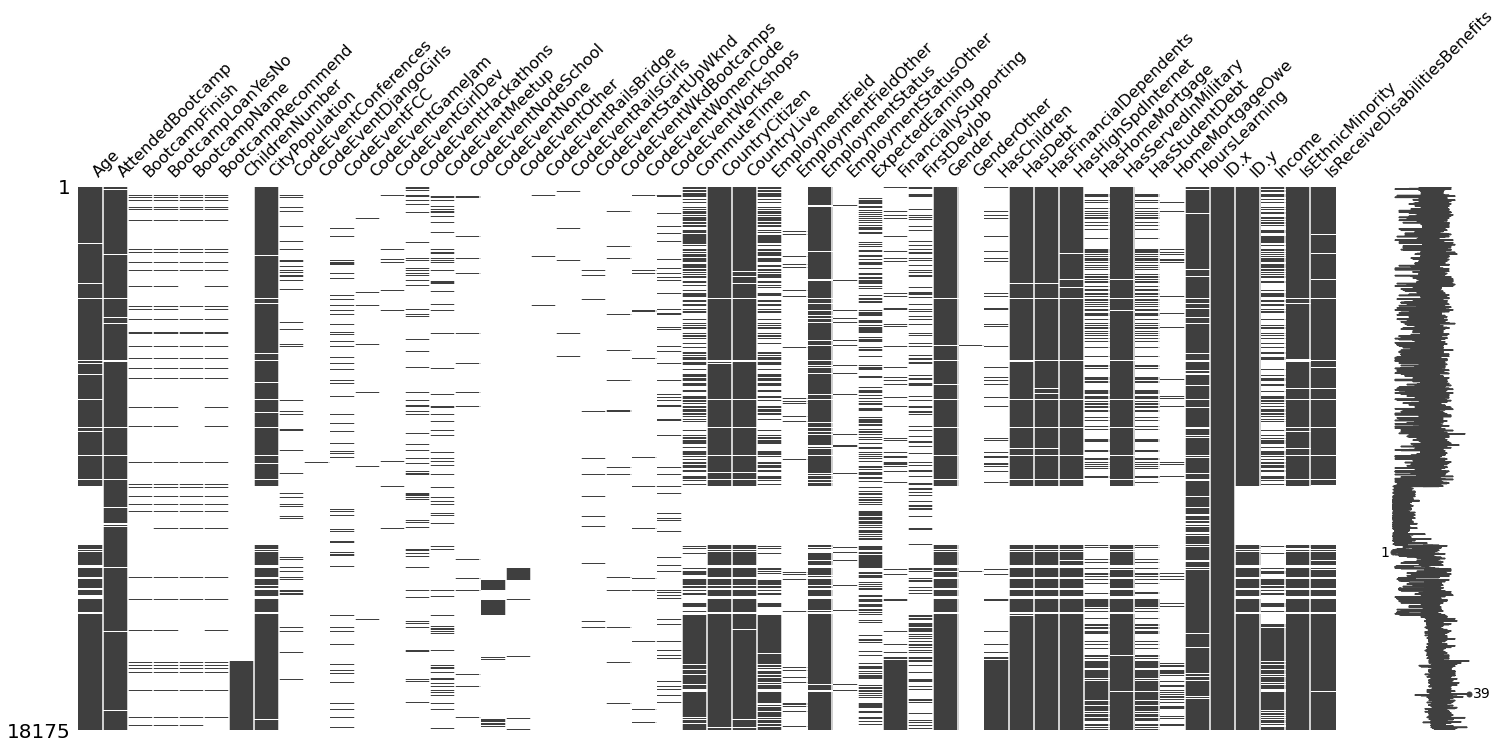

In [4]:
msno.matrix(fcc.iloc[:,:50])

<AxesSubplot:>

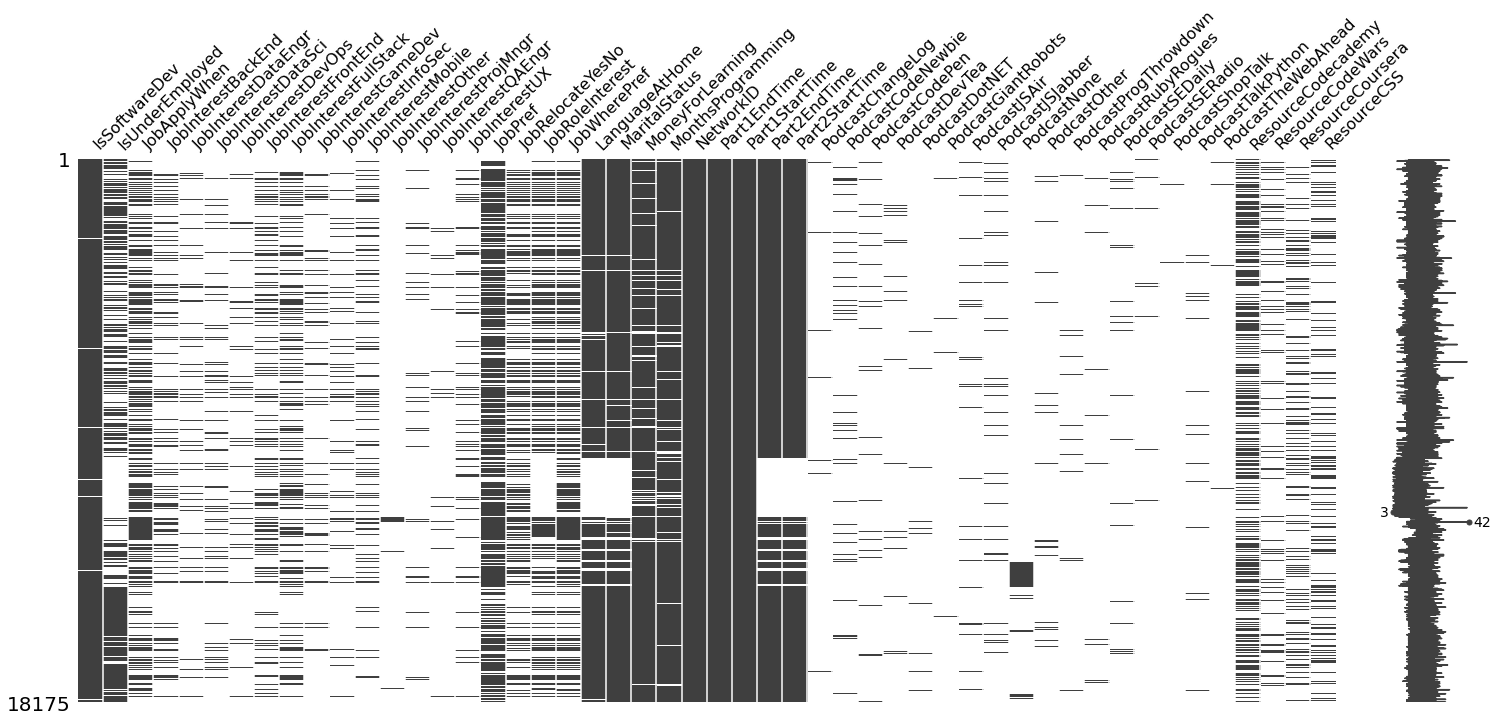

In [5]:
msno.matrix(fcc.iloc[:,50:100])

<AxesSubplot:>

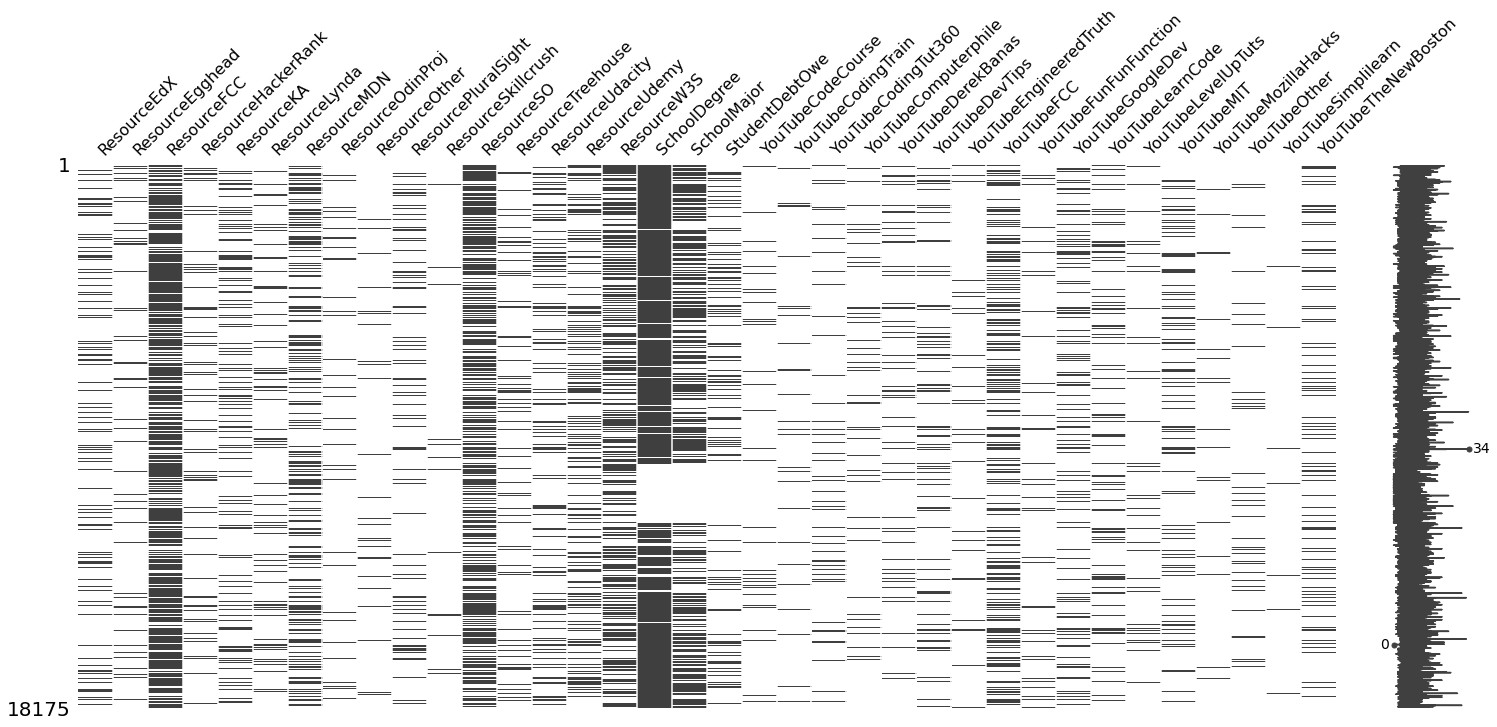

In [6]:
msno.matrix(fcc.iloc[:,100:])

Hence, we can confirm that the majority of columns are almost empty, and are good candidates for further dropping. Before doing that, we'll try to figure out what all these columns mean and which ones are potentially suitable for our analysis:

In [7]:
print(fcc.columns.tolist())

['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo', 'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation', 'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventFCC', 'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons', 'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone', 'CodeEventOther', 'CodeEventRailsBridge', 'CodeEventRailsGirls', 'CodeEventStartUpWknd', 'CodeEventWkdBootcamps', 'CodeEventWomenCode', 'CodeEventWorkshops', 'CommuteTime', 'CountryCitizen', 'CountryLive', 'EmploymentField', 'EmploymentFieldOther', 'EmploymentStatus', 'EmploymentStatusOther', 'ExpectedEarning', 'FinanciallySupporting', 'FirstDevJob', 'Gender', 'GenderOther', 'HasChildren', 'HasDebt', 'HasFinancialDependents', 'HasHighSpdInternet', 'HasHomeMortgage', 'HasServedInMilitary', 'HasStudentDebt', 'HomeMortgageOwe', 'HoursLearning', 'ID.x', 'ID.y', 'Income', 'IsEthnicMinority', 'IsReceiveDisabilitiesBenefits', 'IsSoftwareDev', 'IsUnderEmployed', 'JobApplyWh

We don't have any clear documentation explaining each column name, but luckily, most column names are rather self-explanatory, and also the `raw-data` folder of the dataset repository contains the initial survey questions. From this information, we can conclude that the predominant majority of columns don't represent any interest for our analysis because of: 
- being irrelevant (`HasServedInMilitary`, `CityPopulation`, `IsEthnicMinority`, etc.), 
- referring to the sources of the student's previous additional learning resources (`Podcast...`, `CodeEvent...`, `Resource...`, `YouTube...`), which is rather relative, since one source can be extremely helpful for one person while totally useless for another.

Let's keep only the columns that we can potentially use in the future, whether directly or as a reference:

In [8]:
fcc = fcc[['Age', 'AttendedBootcamp', 'CountryCitizen', 'CountryLive', 
           'EmploymentField', 'EmploymentStatus', 'Gender', 'HasChildren', 
           'HasDebt', 'HasFinancialDependents', 'HasHomeMortgage', 
           'HasStudentDebt', 'HoursLearning', 'Income', 'JobRoleInterest',
           'MaritalStatus', 'MoneyForLearning', 'MonthsProgramming', 
           'SchoolDegree', 'SchoolMajor']]

Now, we're going to check if there are still a lot of missing values in the remaining columns:

In [9]:
round(fcc.isnull().sum()*100/len(fcc), 0)

Age                       15.0
AttendedBootcamp           3.0
CountryCitizen            15.0
CountryLive               16.0
EmploymentField           55.0
EmploymentStatus          21.0
Gender                    15.0
HasChildren               79.0
HasDebt                   16.0
HasFinancialDependents    16.0
HasHomeMortgage           65.0
HasStudentDebt            65.0
HoursLearning              8.0
Income                    58.0
JobRoleInterest           62.0
MaritalStatus             16.0
MoneyForLearning           9.0
MonthsProgramming          6.0
SchoolDegree              15.0
SchoolMajor               52.0
dtype: float64

Some columns (`EmploymentField`, `HasChildren`, `HasHomeMortgage`, `HasStudentDebt`, `Income`, `JobRoleInterest`) still contain many, up to 79%, missing values, meaning that a lot of respondents probably considered the question sensible or irrelevant, or, in the case of `JobRoleInterest`, they just don't have any precise plans yet about their future job role. At the same time, the `MoneyForLearning` column is rather full, hence we'll use it as a column with financial information instead of `Income`.
## Checking for Sample Representativity
For our analysis, we want to answer questions about a population of new coders that are interested in programming subjects (web and mobile development, data science, game development, etc). We'd like to know:
- Where are these new coders located? 
- What are the locations with the greatest number of new coders?
- How much money new coders are willing to spend on learning?
- What is the most common age range of the new coders?

We have the sample data to analyze, but before we need to figure out whether it's representative for our population of interest and if it has the right categories of people for our purpose.

The `JobRoleInterest` column looks like a good point to start with since it describes the role (or roles) each respondent is interested in for future working:

In [10]:
fcc['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                           11.770595
  Front-End Web Developer                                                                                                                                                                                           6.435927
  Data Scientist                                                                                                                                                                                                    2.173913
Back-End Web Developer                                                                                                                                                                                              2.030892
  Mobile Developer                                                                                                  

We can make a couple of observations here:
- The majority of people (~18%) are interested in becoming web developers (especially full-stack and front-end).
- Some people that have several potential jobs in mind.

As for the second observation, let's check the percentage of such people:

+--------------+------+
|  Interested  |  %   |
+--------------+------+
| Several jobs | 68.0 |
|   One job    | 32.0 |
+--------------+------+ 



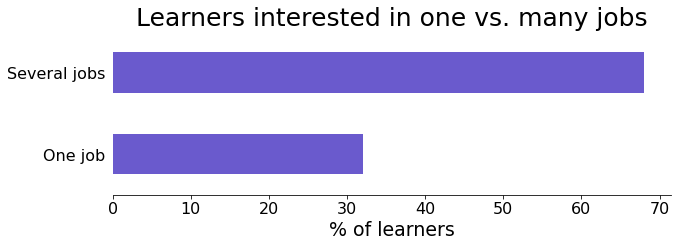

In [11]:
# Split each string in the 'JobRoleInterest' column
roles_without_nan = fcc['JobRoleInterest'].dropna()
roles_split = roles_without_nan.str.split(',')

# Separating job role preferences into 2 groups
number_roles = roles_split.apply(lambda x: 'Several jobs' if len(x)>1 else 'One job')

def count_value_pct_rounded(series):
    '''Counting % of each unique value in a Series, rounded to the 1st decimal'''
    return round(series.value_counts(normalize=True)*100, 0)

def print_pretty_table(series, headers=['Absolute frequency', 'Relative frequency']):
    '''Pretty-printing a Series as a table'''
    print(series.to_markdown(tablefmt='pretty', headers=headers), '\n')
    
def create_barh_plot(series, title, xlabel, yticklabels):
    '''Creating a horizontal bar plot for a Series'''
    fig, ax = plt.subplots(figsize=(10,3))
    series.sort_index().plot.barh(color='slateblue')
    ax.set_title(title, fontsize=25)
    ax.set_xlabel(xlabel, fontsize=19)
    ax.tick_params(axis='both', labelsize=16, left=False)
    ax.set_yticklabels(yticklabels)
    for side in ['top', 'right', 'left']:
        ax.spines[side].set_visible(False)
    plt.show()
    return None

# Counting and visualizing % of the respondents interested in one vs. several jobs
pct_number_roles = count_value_pct_rounded(number_roles)
print_pretty_table(pct_number_roles,
                   headers=['Interested', '%'])   
create_barh_plot(series=pct_number_roles, 
                 title='Learners interested in one vs. many jobs',
                 xlabel='% of learners',
                 yticklabels=['One job', 'Several jobs'])

The great majority of learners (68%) are interested in several potential jobs instead of only one. This is a positive tendency for our e-learning company offering various courses, because some of such students can probably even decide to follow several courses, at least at the beginning.

The focus of the company's courses is on web and mobile development. Let's check how many people are interested in at least one of these two subjects:

+------------+------+
| Web/Mobile |  %   |
| interested |      |
+------------+------+
|    True    | 86.0 |
|   False    | 14.0 |
+------------+------+ 



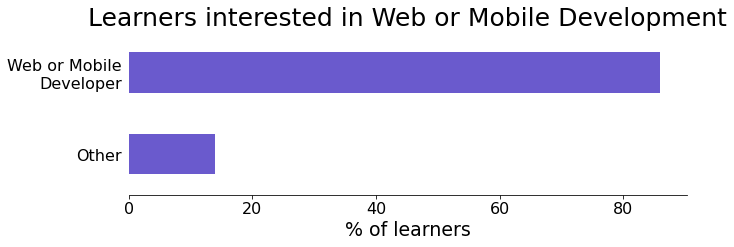

In [12]:
# Selecting the respondents interested in web or mobile developer roles
web_mob_dev = fcc['JobRoleInterest'].str.contains('Web Developer|Mobile Developer')

# Counting and visualizing % of the respondents interested in web or mobile developer roles
pct_web_mob_dev = count_value_pct_rounded(web_mob_dev)
print_pretty_table(pct_web_mob_dev,
                   headers=['Web/Mobile\ninterested', '%']) 
create_barh_plot(series=pct_web_mob_dev, 
                 title='Learners interested in Web or Mobile Development',
                 xlabel='% of learners',
                 yticklabels=['Other', 'Web or Mobile\nDeveloper'])

From the graph and table above, we clearly see that the predominant majority of the survey respondents (86%) are interested in either web or mobile developer positions, whether it is their only preferred job or one of several. This insight definitely makes our sample data representative  for the target audience of our e-learning company (i.e., the whole population), outlined earlier: people who want to learn mostly web or mobile development, or, alternatively, data science, game development, etc.

Now that we confirmed that our sample is representative of the whole population, we are ready to start data analysis.
## Finding the Best Markets by Country
### Locations and Densities of New Coders
First, we'll define the new coders' locations and their densities. We're especially focused on those locations with the greatest number of new coders since they represent the potential best markets to advertise programming courses of our company. 

In our dataset, there are 2 columns related to customers' locations: `CountryCitizen` and `CountryLive`. As their names suggest, the first one describes the country of origin for each respondent, the second – the country of their actual living at the moment of conducting the survey.

For our analysis, we'll work with the second variable, since we're interested in where people actually live at the moment of running the ads. We can think of each country as an individual market, meaning that we have to find the two best countries to advertise in. 

Let's take the number of potential customers as an indicator of a good market and, to grasp a bigger picture, find out the TOP10 markets. Here, by "potential customers" we'll understand those respondents who answered the survey question about their future job role interests.

+--------------------------+--------------------+--------------------+
|                          | Absolute frequency | Relative frequency |
+--------------------------+--------------------+--------------------+
| United States of America |       3125.0       |        46.0        |
|          India           |       528.0        |        8.0         |
|      United Kingdom      |       315.0        |        5.0         |
|          Canada          |       260.0        |        4.0         |
|          Poland          |       131.0        |        2.0         |
|          Brazil          |       129.0        |        2.0         |
|         Germany          |       125.0        |        2.0         |
|        Australia         |       112.0        |        2.0         |
|          Russia          |       102.0        |        1.0         |
|         Ukraine          |        89.0        |        1.0         |
+--------------------------+--------------------+--------------------+ 



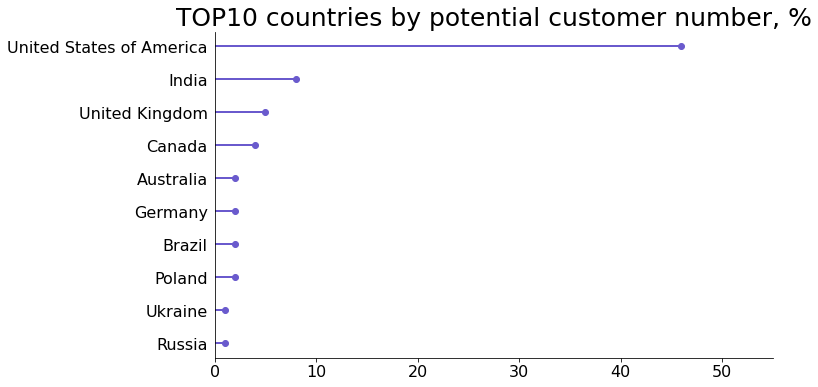

In [13]:
# Keeping only not-null values of the `JobRoleInterest` column
fcc = fcc[fcc['JobRoleInterest'].notnull()].copy()

def create_freq_table(df, column, order=False):    
    '''Creating a frequency table (both absolute and relative frequencies) 
    for a column of a dataframe, with the possibility to assign the order of the values
    '''
    if not order:
        order = df[column].value_counts().index.tolist()   # the default order if not preassigned
    abs_freq = df[column].value_counts()[order]
    rel_freq=count_value_pct_rounded(df[column])[order]    
    freq_table = pd.DataFrame(data={'Absolute frequency': abs_freq, 
                                    'Relative frequency': rel_freq})
    return freq_table

def create_stem_plot(height, series, title, x_max):
    '''Creating a vertical stem plot for a Series'''
    fig, ax = plt.subplots(figsize=(10,height))
    ax.hlines(y=series.index, 
              xmin=0, xmax=series, 
              color='slateblue', 
              linewidth=2)
    ax.plot(series, series.index, 
            'o', 
            c='slateblue')
    ax.set_title(title, fontsize=25)
    ax.set_xlim(0,x_max)
    ax.tick_params(axis='both', labelsize=16, left=False)
    for side in ['top', 'right']:
        ax.spines[side].set_visible(False)
    plt.show()
    return None

 
# Creating a frequency table of potential customers by country    
freq_table_countries = create_freq_table(df=fcc, column='CountryLive')

# Pretty-printing the first 10 countries with their corresponding frequencies
print_pretty_table(freq_table_countries.iloc[:10,:]) 

# Plotting TOP10 countries with their relative frequencies in %
top_10 = freq_table_countries['Relative frequency'].iloc[:10].sort_values()
create_stem_plot(height=6,
                 series=top_10,
                 title='TOP10 countries by potential customer number, %',
                 x_max=55) 

46% of our potential customers live in the USA, so we can consider this country as the best market to choose for advertisement. However, based on the table and graph above, we can't be sure about the second best market: even though India is the runner-up, only 8% of our potential customers live there, which is not much different from the third-ranked UK (5%). 

Hence, now we found useful information about the location of new coders, but we can't stop the analysis here and need to go more in-depth before making a decision.
### Spending Money for Learning
Let's continue by figuring out how much money new coders are actually ready to spend on learning per month. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The `MoneyForLearning` column describes the amount of money in American dollars spent by each respondent, while `MonthsProgramming` – the number of months they had been learning programming from the moment they started till the moment they completed the survey. Dividing the amount of money by the number of months, we'll get the amount of money each participant is ready to spend per month for learning to code. Then we should compare the resulting values with the reference point: the price per month of all the subscriptions offered by our e-learning company, which is $59.

It makes sense to limit our analysis to only 4 countries: the **USA**, **India**, the **UK**, and **Canada**. Apart from having the highest amount of potential clients, as we saw in the graph above, this choice is also explained by the fact that English is an official language in all these countries, and our courses are written in English. The more English-speaking people, the larger a potential target audience for our ads.

In [14]:
# Replacing 0 months (for the students who had just started learning programming) with 1 
# to avoid dividing by 0
fcc['MonthsProgramming'] = fcc['MonthsProgramming'].apply(lambda x: 1 if x==0 else x)

# Calculating the amount of money per month for each respondent
fcc['MoneyPerMonth'] = fcc['MoneyForLearning']/fcc['MonthsProgramming']

# Finding the % of missing values in the `MoneyPerMonth` column
print('% of missing values in the `MoneyPerMonth` column:',\
round(fcc['MoneyPerMonth'].isnull().sum()*100/len(fcc),0))

% of missing values in the `MoneyPerMonth` column: 10.0


The rows with missing values in the `MoneyPerMonth` and `CountryLive` columns don't represent any interest for our further analysis (since we need exactly the information about the country and money per month), so we'll drop them:

In [15]:
fcc = fcc.dropna(subset=['MoneyPerMonth', 'CountryLive'])

Now, let's find the mean and median metrics for money per month by country:

In [16]:
def find_mean_by_categories(df=fcc, column='CountryLive', cat_name='country', 
                            categories=['United States of America', 'India',
                                        'United Kingdom', 'Canada']):
    '''Finding the mean values of the amount of money per month by category in a dataframe
    Implies the presence of the `MoneyPerMonth` column
    '''
    column_mean = df.groupby(column).mean()
    column_mean.index.rename(' ', inplace=True)
    print(f'MEAN for money per month by {cat_name}:')
    print(round(column_mean['MoneyPerMonth'][categories],0), 2*'\n')
    
def find_median_by_categories(df=fcc, column='CountryLive', cat_name='country', 
                              categories=['United States of America', 'India', 
                                          'United Kingdom', 'Canada']):
    '''Finding the median values of the amount of money per month by category in a dataframe
    Implies the presence of the `MoneyPerMonth` column
    '''
    column_median = df.groupby(column).median()
    column_median.index.rename(' ', inplace=True)
    print(f'MEDIAN for money per month by {cat_name}')
    print(round(column_median['MoneyPerMonth'][categories],0), 2*'\n')

find_mean_by_categories(df=fcc)
find_median_by_categories(df=fcc)

MEAN for money per month by country:
 
United States of America    228.0
India                       135.0
United Kingdom               46.0
Canada                      114.0
Name: MoneyPerMonth, dtype: float64 


MEDIAN for money per month by country
 
United States of America    3.0
India                       0.0
United Kingdom              0.0
Canada                      0.0
Name: MoneyPerMonth, dtype: float64 




**Mean**: the results for the UK and Canada are unexpectedly low relative to the values we see for India. If we look at the [GDP per capita world map](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita#Lists_of_countries_and_dependencies):

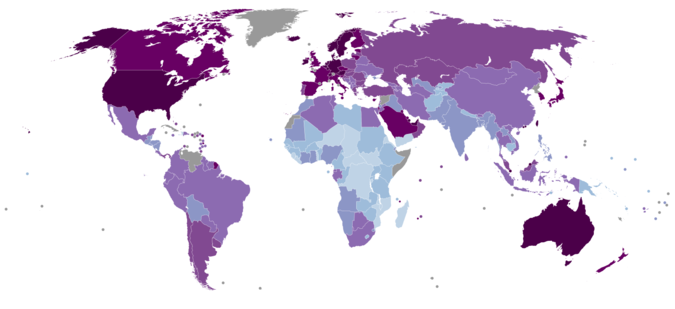

we'd intuitively expect people in the UK and Canada to spend more on learning than people in India. It might be a question of data representativity, or there are some outliers, probably coming from wrong survey answers, or it might be that the results are correct.


**Median**: at least half of potential customers in India, the UK, and Canada had spent nothing for their learning at the moment of the survey, and for the USA the median value is not much higher than 0. Probably these people are learning programming through YouTube videos, or some free resources/books/online platforms, etc. Statistically speaking, the resulting median values show that the distributions of money per month for each country are severely right-skewed, most probably with a lot of upper outliers, and the mean values strongly influenced by both very high values of the upper outliers and a huge amount of 0 values in the distribution. 

The presence of so many respondents who learn to program free of charge is an interesting question for further discussion. Should we consider them as our potential clients? There are 2 scenarios to keep in mind:
- The fact that these people didn't pay anything until the moment of the survey can mean that they had recently started learning, and at the beginning preferred to taste this sphere free of charge, for then later deciding if they want to continue with a paid course/bootcamp or not. In this case, they are in the stage of selection, so the courses of our company, which are rather affordable ($59 /month), could easily be their choice. So, it seems to be quite a promising niche for our market. 


- On the other hand, it doesn't seem very realistic that the percentage of such learners is so high (at least 50%), and even in several countries. Looking for an alternative explanation, we can think of this category of people (or a big part of it) as those who prefer free learning in general. Indeed there are quite a lot of free resources on the Internet nowadays (and freeCodeCamp is one of them, as its name suggests), even though probably not all of them are perfectly structured. So, some people could just decide to follow these resources and learn what they need for their purposes. In this case, it doesn't seem that they want to pay money for something that, in their opinion, can be found free on the Internet, and then they are not really our target audience. This second reasoning sounds more plausible.

Hence, before moving on, let's check one thing: if among our 4 countries there are some particularly prone to having people willing to learn free of charge. From the median values, we already know that **at least** half of the respondents in India, the UK, and Canada didn't pay anything up until the survey, but it can mean 50% or, in an extreme case, 99%, with the only outlier representing the current mean value. As an experiment, let's remove such learners, reconstruct the graph from the section on *Locations and Densities of New Coders* (this time, though, we'll limit ourselves to the TOP4 countries), and see if something changes drastically:

Overall number of potential clients:	  6212
Number of potential clients ready to pay: 3172 

+--------------------------+--------------------+--------------------+
|                          | Absolute frequency | Relative frequency |
+--------------------------+--------------------+--------------------+
| United States of America |       1619.0       |        51.0        |
|          India           |       201.0        |        6.0         |
|      United Kingdom      |       137.0        |        4.0         |
|          Canada          |       114.0        |        4.0         |
+--------------------------+--------------------+--------------------+ 



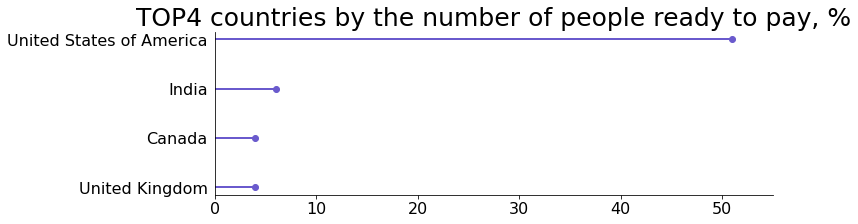

In [17]:
print('Overall number of potential clients:\t ', len(fcc))

# Considering only the respondents who paid for their learning
fcc_exp = fcc[fcc['MoneyPerMonth']>0.0].copy()

print('Number of potential clients ready to pay:', len(fcc_exp), '\n')

# Creating a frequency table of potential customers ready to pay   
freq_table_countries = create_freq_table(df=fcc_exp, column='CountryLive')

# Pretty-printing the first 4 countries with their corresponding frequencies
print_pretty_table(freq_table_countries.iloc[:4,:])

# Plotting the TOP4 countries with their relative frequencies in %
top_4 = freq_table_countries['Relative frequency'].iloc[:4].sort_values()
create_stem_plot(height=3,
                 series=top_4,
                 title='TOP4 countries by the number of people ready to pay, %',
                 x_max=55)

In general, slightly more than half of the respondents want to learn for free, which actually means that they are not probably our target audience. However, the proportions among our 4 countries remain almost the same, without any significant changes. We can notice, though, that the number of potential customers in the USA has grown by 5% with respect to the previous graph, in India – dropped by 2%, in Canada – dropped by 1%, and the UK and Canada have changed places. These observations confirm once again that the USA is definitely our major target, and that for further analysis we can keep those students learning for free since they represent a roughly equal proportion in our countries of interest 
### Dealing with Extreme Outliers
Let's check the outliers in the `MoneyPerMonth` variable for our 4 countries. For this purpose, we'll create box plots for them:

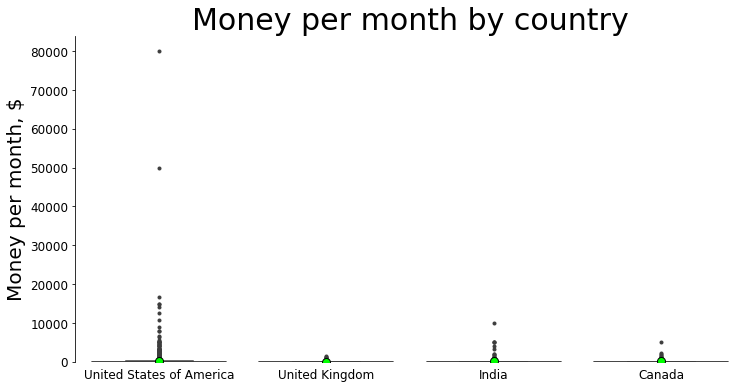

In [18]:
def create_box_plot(df=fcc,
                    column='CountryLive',
                    string='United States of America|India|United Kingdom|Canada',
                    title='Money per month by country',
                    xlabel=''):
    '''Creating box plots by category for a column in a dataframe
    Implies the presence of the `MoneyPerMonth` column
    '''
    fig, ax = plt.subplots(figsize=(12,6))
    ax = sns.boxplot(x=column, y='MoneyPerMonth', 
                     data=df[df[column].str.contains(string)],
                     flierprops=dict(marker='o', markersize=3),
                     showmeans=True,
                     meanprops={'marker':'o',
                                'markerfacecolor':'lime', 
                                'markeredgecolor':'black',
                                'markersize':'8'})
    sns.despine(bottom=True)
    ax.tick_params(axis='both', labelsize=12, bottom=False)
    ax.set_title(title, fontsize=30)
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel('Money per month, $', fontsize=20)
    ax.set_ylim(0,None)
    plt.show()
    return None

# Creating box plots for the `MoneyPerMonth` column by countries
create_box_plot(df=fcc)

We see that our box plots are very squeezed (because of the severely right-skewed distributions, as mentioned earlier), and there are a lot of outliers for each country, but the main issue, for now, seems to be the presence of the 2 extreme outliers for the USA. Even though they can be correct values (maybe the amount of money paid ahead for some super-expensive course, for example), they look off anyway and significantly distort the overall picture. Because of them, we can't say much about India, the UK, and Canada; also, it's impossible to locate the real position of the mean values (light-green circles) on the distributions. Let's eliminate these outliers and recompute the mean values for money per month by country, just like we did in the previous section:

MEAN for money per month by country:
 
United States of America    184.0
India                       135.0
United Kingdom               46.0
Canada                      114.0
Name: MoneyPerMonth, dtype: float64 




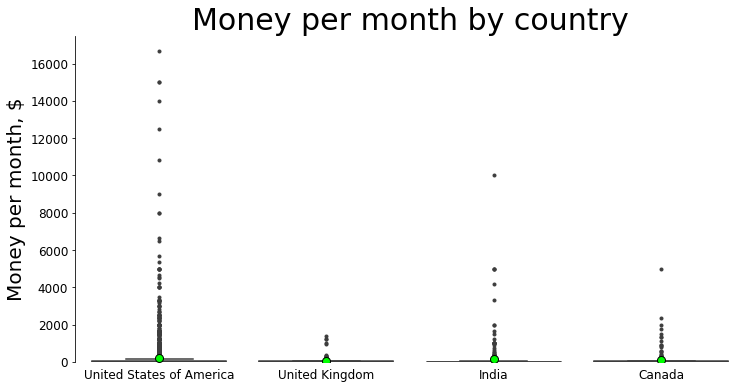

In [19]:
# Isolating only the values of the `MoneyPerMonth` column smaller than $20,000
fcc = fcc[fcc['MoneyPerMonth']<20000]

# Recomputing the mean values by country and reconstructing box plots
find_mean_by_categories(df=fcc)
create_box_plot(df=fcc)

The mean values still look weird, the box plots are still very squeezed and with a lot of outliers, especially for the USA, but also for the other 3 countries. Let's take a closer look at the outliers for India: few people paid more than $2,500 per month. We can isolate these respondents and examine their answers to other questions in the survey. For example, it can happen that they attended some ultra-expensive bootcamps, then their big expenses with learning are justified:

In [20]:
# Isolating the outliers for India with the values equal or higher than $2,500
india_outliers = fcc[(fcc['CountryLive']=='India')&(fcc['MoneyPerMonth']>=2500)]
india_outliers

,Age,AttendedBootcamp,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasChildren,HasDebt,HasFinancialDependents,HasHomeMortgage,HasStudentDebt,HoursLearning,Income,JobRoleInterest,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,MoneyPerMonth
1728,24.0,0.0,India,India,NaN,A stay-at-home parent or homemaker,male,NaN,0.0,0.0,NaN,NaN,30.0,NaN,"User Experience Designer, Mobile Developer...","single, never married",20000.0,4.0,bachelor's degree,Computer Programming,5000.000000
1755,20.0,0.0,India,India,NaN,Not working and not looking for work,male,NaN,0.0,0.0,NaN,NaN,10.0,NaN,"Information Security, Full-Stack Web Developer...","single, never married",50000.0,15.0,bachelor's degree,Computer Science,3333.333333
7989,28.0,0.0,India,India,software development and IT,Employed for wages,male,0.0,1.0,1.0,0.0,1.0,20.0,300000.0,"User Experience Designer, Back-End Web Devel...",married or domestic partnership,5000.0,1.0,bachelor's degree,Aerospace and Aeronautical Engineering,5000.000000
8126,22.0,0.0,India,India,NaN,Not working but looking for work,male,NaN,1.0,0.0,0.0,1.0,80.0,NaN,"Back-End Web Developer, Full-Stack Web Develop...","single, never married",5000.0,1.0,bachelor's degree,Electrical and Electronics Engineering,5000.000000
13398,19.0,0.0,India,India,NaN,Unable to work,male,NaN,0.0,0.0,NaN,NaN,30.0,NaN,Mobile Developer,"single, never married",20000.0,2.0,bachelor's degree,Computer Science,10000.000000
15587,27.0,0.0,India,India,software development and IT,Employed for wages,male,0.0,1.0,1.0,0.0,1.0,36.0,60000.0,"Full-Stack Web Developer, Data Scientist","single, never married",100000.0,24.0,bachelor's degree,Communications,4166.666667


It results that these 6 people hadn't attended any bootcamp. Moreover, some of them have debts, including student debts, and financial dependents. Most probably, these outliers derive from some misunderstanding of the survey questions. Anyway, it's better to exclude them from further analysis:

In [21]:
# Removing the outliers for India
fcc = fcc.drop(india_outliers.index)

Now, let's look at the other outliers for the USA, those with the values more than $7,500:

In [22]:
# Isolating the outliers for the USA with the values equal or higher than $7,500
usa_outliers = fcc[(fcc['CountryLive']=='United States of America')&(fcc['MoneyPerMonth']>=7500)]
usa_outliers

,Age,AttendedBootcamp,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasChildren,HasDebt,HasFinancialDependents,HasHomeMortgage,HasStudentDebt,HoursLearning,Income,JobRoleInterest,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,MoneyPerMonth
718,26.0,1.0,United States of America,United States of America,architecture or physical engineering,Employed for wages,male,NaN,0.0,0.0,NaN,NaN,35.0,44500.0,"User Experience Designer, Full-Stack Web Dev...","single, never married",8000.0,1.0,bachelor's degree,Architecture,8000.000000
3184,34.0,1.0,NaN,United States of America,software development and IT,Employed for wages,male,NaN,0.0,0.0,NaN,NaN,10.0,40000.0,"Quality Assurance Engineer, DevOps / SysAd...","single, never married",9000.0,1.0,"some college credit, no degree",NaN,9000.000000
3930,31.0,0.0,United States of America,United States of America,NaN,Not working and not looking for work,male,NaN,1.0,0.0,0.0,1.0,50.0,NaN,"DevOps / SysAdmin, Front-End Web Developer...",married or domestic partnership,65000.0,6.0,bachelor's degree,Biology,10833.333333
6805,46.0,1.0,United States of America,United States of America,NaN,Not working but looking for work,male,NaN,1.0,0.0,0.0,1.0,45.0,NaN,"Full-Stack Web Developer, Game Developer, Pr...",married or domestic partnership,15000.0,1.0,bachelor's degree,Business Administration and Management,15000.000000
7198,32.0,0.0,United States of America,United States of America,education,Employed for wages,male,NaN,1.0,0.0,0.0,1.0,4.0,NaN,"Full-Stack Web Developer, Back-End Web Developer","single, never married",70000.0,5.0,"professional degree (MBA, MD, JD, etc.)",Computer Science,14000.000000
9778,33.0,1.0,United States of America,United States of America,education,Employed for wages,male,NaN,1.0,0.0,0.0,1.0,40.0,20000.0,"Full-Stack Web Developer, Data Engineer, Qua...","single, never married",8000.0,1.0,master's degree (non-professional),Chemical Engineering,8000.000000
16650,29.0,0.0,United States of America,United States of America,NaN,Not working but looking for work,male,1.0,1.0,1.0,1.0,1.0,40.0,NaN,"Product Manager, Data Engineer, Full-Stack W...",married or domestic partnership,200000.0,12.0,associate's degree,Computer Programming,16666.666667
16997,27.0,0.0,United States of America,United States of America,health care,Employed for wages,female,1.0,1.0,1.0,0.0,1.0,12.0,40000.0,"Mobile Developer, Game Developer, User Exp...","single, never married",12500.0,1.0,"some college credit, no degree",NaN,12500.000000
17231,50.0,0.0,Kenya,United States of America,NaN,Not working but looking for work,female,1.0,0.0,1.0,NaN,NaN,1.0,NaN,Front-End Web Developer,married or domestic partnership,30000.0,2.0,bachelor's degree,Computer Programming,15000.000000


Also among these respondents, some people hadn't attended any bootcamp before the  survey. Moreover, some of these people have debts and financial dependents, so their spending large amounts of money per month, and especially with no clear clue to which learning resource, makes these values look suspicious. 

Another interesting insight is that some of the respondents above (some of those who attended a bootcamp) had been learning for 3 or less  months by that moment. It can mean that they paid in advance a big sum of money for their bootcamp, and were not supposed to pay during the next months. Anyway, their large expenses, divided by 1, or 2, or 3 months, gave very high and non-representative values of money per month.

We'll exclude from our analysis both the respondents who didn't attend any bootcamp and those who attended for a very short period (<=3 months):

In [23]:
# Removing the outliers for the USA
fcc = fcc.drop(usa_outliers.index)

Finally, let's see what's wrong with an extreme outlier for Canada: more than $5,000:

In [24]:
# Isolating the outliers for the USA with the values equal or higher than $5,000
canada_outlier = fcc[(fcc['CountryLive']=='Canada')&(fcc['MoneyPerMonth']>=5000)]
canada_outlier

,Age,AttendedBootcamp,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasChildren,HasDebt,HasFinancialDependents,HasHomeMortgage,HasStudentDebt,HoursLearning,Income,JobRoleInterest,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,MoneyPerMonth
13659,24.0,1.0,Canada,Canada,finance,Employed for wages,male,NaN,1.0,0.0,1.0,0.0,10.0,140000.0,"Mobile Developer, Full-Stack Web Developer, ...","single, never married",10000.0,2.0,bachelor's degree,Finance,5000.0


The same situation as we saw earlier: a person with a mortgage, debts, financial dependants, who had been attending a bootcamp for 2 months at the moment of conducting the survey. We'll remove also this outlier, recalculate the mean values, and update box plots:

MEAN for money per month by country:
 
United States of America    147.0
India                        66.0
United Kingdom               46.0
Canada                       93.0
Name: MoneyPerMonth, dtype: float64 




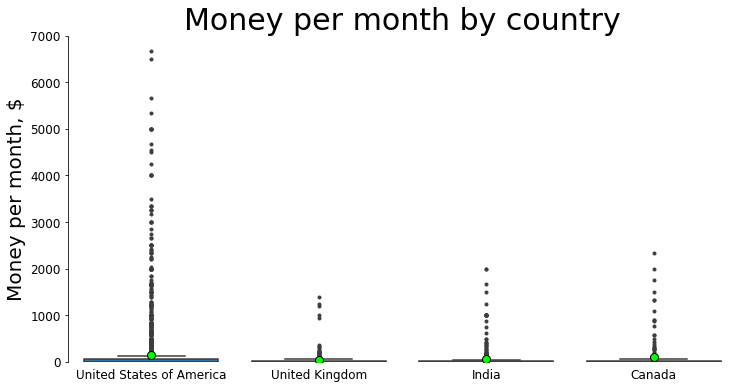

In [25]:
# Removing the outliers for Canada
fcc = fcc.drop(canada_outlier.index)

# Recomputing the mean values by country and reconstructing box plots
find_mean_by_categories(df=fcc)
create_box_plot(df=fcc)

Now that we eliminated the extreme outliers, we still have quite a lot of other outliers (even though "less extreme") and very squeezed box plots for each country. Practically, on the graph above we see only outliers of different scales rather than more common value distributions. The mean values have been changed, even though they remain heavily influenced by the outliers. In fact, we can already distinguish the mean value locations on the distributions, but they either coincide with the maximum values (the ends of the "whiskers" of the box plots) or are even greater than them. Also, in the table above they still  look weird for India vs. the UK and Canada. 

Returning to our selecting the 2 best markets to advertise in, we don't have much new to add: the only clear choice is the USA, with many new coders living there and ready to pay a good amount of money each month. We have to continue our research to find also the second market.
### Choosing the Second Best Market
Let's take another look at the mean of money per month for the remaining 3 countries:

In [26]:
find_mean_by_categories(df=fcc)

MEAN for money per month by country:
 
United States of America    147.0
India                        66.0
United Kingdom               46.0
Canada                       93.0
Name: MoneyPerMonth, dtype: float64 




Since all our subscriptions cost $59, the UK should be excluded at this stage, while both India and Canada seem to be good candidates. The mean metric for money per month for Canada looks much higher of that for India. However, the price of our subscriptions is fixed, as well as rather affordable in general, and the mean values for both countries are higher than that anyway. 

At this point, let's remember another important information analyzed earlier: the number of potential customers in each country:

In [27]:
# Creating a frequency table of potential customers for the countries in interest  
freq_table_countries = create_freq_table(df=fcc, column='CountryLive')
top_4 = freq_table_countries['Relative frequency'].iloc[:4].sort_values()
top_4.sort_values(ascending=False)

United States of America    47.0
India                        7.0
United Kingdom               5.0
Canada                       4.0
Name: Relative frequency, dtype: float64

We see that the number of potential customers in India is almost twice bigger as in Canada, which makes India a more suitable candidate for the second best market. 

If we select the USA and India, it makes sense to split the advertising budget unequally, proportionally to the number of potential customers in both countries. In our case, it means assigning 86% of the budget to the USA and 14% to India.

We can think of a couple of other strategies, though:
- Advertising only in the USA, since it remains an obvious leader both by the number of potential clients **ready to pay** and their paying capacity.
- Advertising in the USA, India, and Canada. Also in this case, we'd better split the budget proportionally to the number of potential customers: 80% for the USA, 13% for India, and 7% for Canada.

As for the last strategy, however, let's first check one more thing. In the section on *Spending Money for Learning*, we found out that there are a lot of students who prefer learning for free. As an experiment, we'll exclude them, as well as those paying less than some small sum of money (say, 10 dollars/month) for learning. All the other students are our real target audience: even though somebody pays now, say, $20 per month, it means that this person is **ready to pay** for learning, and depending on the quality of the course materials, available skill paths, some other services (like career support, 1-to-1 guidance, etc.) he or she can also become **interested in our courses**, whether in parallel with their current studies or instead of them. Hence, we want to recalculate the mean and median of money spent per month, and also the number of our **real** potential customers by country:

Overall number of potential clients:		        6190
Number of potential clients ready to pay more than $10: 2239 


MEAN for money per month by country:
 
United States of America    356.0
India                       242.0
United Kingdom              133.0
Canada                      273.0
Name: MoneyPerMonth, dtype: float64 


MEDIAN for money per month by country
 
United States of America    67.0
India                       83.0
United Kingdom              50.0
Canada                      50.0
Name: MoneyPerMonth, dtype: float64 


+--------------------------+--------------------+--------------------+
|                          | Absolute frequency | Relative frequency |
+--------------------------+--------------------+--------------------+
| United States of America |       1202.0       |        54.0        |
|          India           |       123.0        |        5.0         |
|      United Kingdom      |        94.0        |        4.0         |
|          Canada          |      

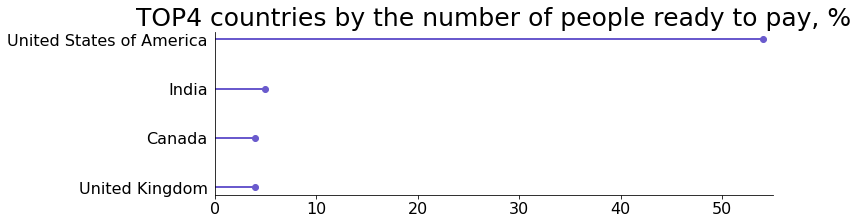

In [28]:
print('Overall number of potential clients:\t\t       ', len(fcc))

# Considering only the respondents who paid for their learning more than $10/month
fcc_exp = fcc[fcc['MoneyPerMonth']>10.0].copy()

print('Number of potential clients ready to pay more than $10:', len(fcc_exp), 2*'\n')

# Calculating the average metrics without the students learning for less than $10/month
find_mean_by_categories(df=fcc_exp)
find_median_by_categories(df=fcc_exp) 

# Creating a frequency table of potential customers ready to pay
freq_table_countries = create_freq_table(df=fcc_exp, column='CountryLive')

# Pretty-printing the first 4 countries with their corresponding frequencies
print_pretty_table(freq_table_countries.iloc[:4,:])   

# Plotting the TOP4 countries with their relative frequencies in %
top_4 = freq_table_countries['Relative frequency'].iloc[:4].sort_values()

create_stem_plot(height=3, 
                 series=top_4, 
                 title='TOP4 countries by the number of people ready to pay, %', 
                 x_max=55)

We see that the mean values have significantly increased without low-to-0 payment data, and are evidently higher than our threshold of \$59. However, the mean metric is very sensitive to the outliers, and here we have a lot of them. So, in our case, we'd better focus on the median values for each country, which suggests that the USA and India are the best markets to advertise. As for the contribution of each country to the number of potential clients, we see that for the USA it increased even more after our last experiment in the section on *Spending Money for Learning* (since then, we removed some extreme outliers and also increased the threshold from 0 to $10), while for India it has dropped by 1% again, and for the UK and Canada remained the same.

Hence, our suggestions for the advertisement campaign at this stage are:
- Advertising **both in the USA and India** (91% and 9% of the advertising budget correspondingly).
- Advertising **only in the USA**.

The optimal approach would be to send these results to the company's marketing team and let them use their domain knowledge to make the best decision.

## Finding the Best Markets by Age
### Age Range of New Coders (the USA only)
Let's now dig a bit deeper and take a look at the best markets from another angle: different age categories. Since we already know that the USA represents the main target for our ads in any case (at least 91%, as discussed above), we can simplify our task by considering age categories only for this country:

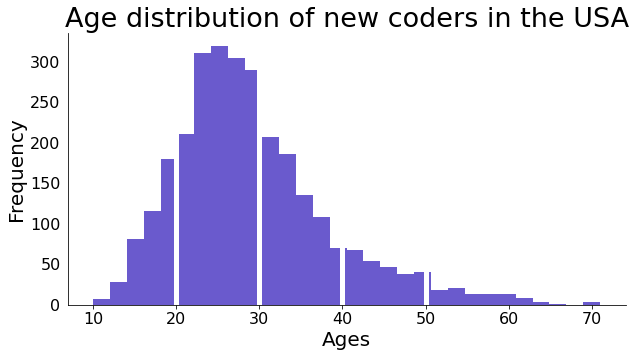

In [29]:
# Isolating only the respondents from the USA
usa = fcc[fcc['CountryLive']=='United States of America']

# Excluding missing values
usa = usa[usa['Age'].notnull()].copy()

# Creating a histogram
fig, ax = plt.subplots(figsize=(10,5))
usa['Age'].hist(bins=30, color='slateblue')
ax.set_title('Age distribution of new coders in the USA', fontsize=27)
ax.set_xlabel('Ages', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)
ax.tick_params(axis='both', labelsize=16, left=False)
for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
ax.grid(False)
for x in [20, 30, 40, 50]:
    plt.axvline(x, color='white', linewidth=5)
plt.show()

From this histogram, we can distinguish the following ranges for further age categorizing and analysis: younger than 20, 20s, 30s, 40s, older than 50.

In [30]:
def categorize_age(age):
    '''Categorizing age in 5 ranges'''
    if age<20:
        return 'Teens'
    elif age<30:
        return '20s'
    elif age<40:
        return '30s'
    elif age<50:
        return '40s'
    else:
        return '50+'
    
# Creating the 'Age_cat' column  
usa['Age_cat'] = usa['Age'].apply(categorize_age)
usa['Age_cat'].unique().tolist()

['30s', '20s', '40s', 'Teens', '50+']

Now that we categorized age in different ranges, let's visualize the number of potential customers by age category:

+-------+--------------------+--------------------+
|       | Absolute frequency | Relative frequency |
+-------+--------------------+--------------------+
| Teens |       310.0        |        11.0        |
|  20s  |       1388.0       |        48.0        |
|  30s  |       814.0        |        28.0        |
|  40s  |       263.0        |        9.0         |
|  50+  |       115.0        |        4.0         |
+-------+--------------------+--------------------+ 



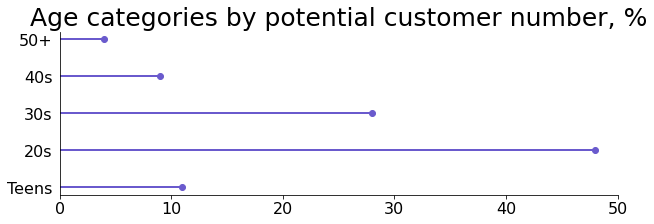

In [31]:
# Generating absolute and relative frequencies for the `Age_cat` column 
freq_table_ages = create_freq_table(df=usa, 
                                    column='Age_cat', 
                                    order=['Teens', '20s', '30s', 
                                           '40s', '50+'])  
     
# Pretty-printing the age categories with their corresponding frequencies
print_pretty_table(freq_table_ages) 

# Plotting the age categories with their relative frequencies (in %)
ages_to_plot = freq_table_ages['Relative frequency']

create_stem_plot(height=3, 
                 series=ages_to_plot,
                 title='Age categories by potential customer number, %',
                 x_max=50)

Based on the number of potential clients, the 2 most promising categories seem to be the learners in their 20s and 30s. However, more important information for us remains the amount of money the learners from each category are ready to pay per month and how it's related to our threshold of $59.

### Spending Money for Learning
Let's find the mean and median metrics of the amount of money spent per month by each category:

In [32]:
find_mean_by_categories(df=usa,
                        column='Age_cat', 
                        cat_name='age category',
                        categories=['Teens', '20s', '30s', '40s', '50+'])

find_median_by_categories(df=usa,
                        column='Age_cat', 
                        cat_name='age category',
                        categories=['Teens', '20s', '30s', '40s', '50+'])

MEAN for money per month by age category:
 
Teens     17.0
20s      118.0
30s      220.0
40s      200.0
50+      152.0
Name: MoneyPerMonth, dtype: float64 


MEDIAN for money per month by age category
 
Teens     0.0
20s       2.0
30s      14.0
40s      20.0
50+      12.0
Name: MoneyPerMonth, dtype: float64 




Some preliminary observations:
- At this point, we can easily exclude the learners under 20 from our analysis, since the mean value of money per month for them is far lower than our threshold, most probably, due to a high percentage of people (more than a half) who learned free till the moment of conducting the survey, and despite the possible presence of the upper outliers. 


- As for the learners in their 20s, our most numerous potential customers, at least half of them paid rather few per month for their learning before the survey: up to $2. We should keep in mind this insight for our future decision.


- All the other mean values, apart from the learners under 20, are rather high, and definitely higher than our threshold, but presumably, they can be strongly biased by the outliers, which we're going to check soon.

In [33]:
# Excluding the learners under 20
usa = usa[usa['Age_cat']!='Teens']

### Dealing with Extreme Outliers

Now, let's check the outliers in the `MoneyPerMonth` column for the remaining age categories, just as we did in the previous chapter on *Finding the Best Markets by Country*:

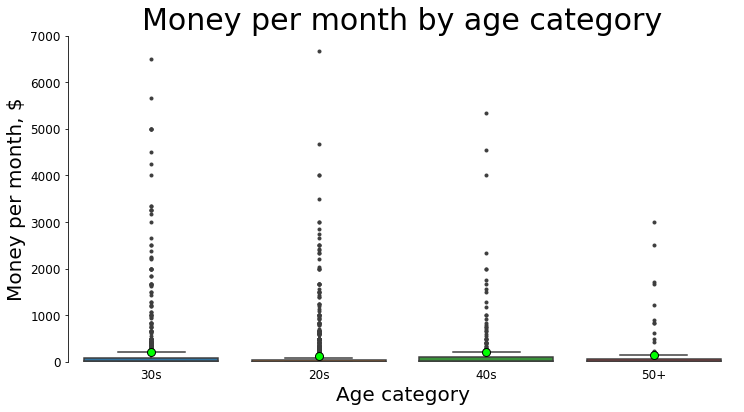

In [34]:
# Creating box plots for the `MoneyPerMonth` column by age category
create_box_plot(df=usa,
                column='Age_cat', 
                string='0',
                title='Money per month by age category',
                xlabel='Age category')

Again we see heavily squeezed box plots reflecting severely right-skewed distributions, with the mean values shifted towards the maximum values, and with a lot of upper outliers. 

The extreme outliers are related to the respondents who paid more than $3,500 per month. Let's take a look at them for all the age ranges. Before doing so, though, let's ignore the following cases:
- when the respondent hadn't attended any bootcamp before the survey, so, as we  saw earlier, it's difficult to justify such high payments,
- when the respondent had been learning programming for 3 or less months before the survey (the reasoning behind it we discussed earlier as well).

Excluding the outliers related to these 2 cases (they'll be dropped anyway), we have the most "suspicious" outliers to deal with:

In [35]:
# Isolating the outliers with `MoneyPerMonth` equal or higher than $3,500
# except for the 2 cases above
above_3500_outliers = usa[(usa['MoneyPerMonth']>=3500)\
                          &(usa['AttendedBootcamp']!=0.0)\
                          &(usa['MonthsProgramming']>3.0)]
above_3500_outliers

,Age,AttendedBootcamp,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasChildren,HasDebt,HasFinancialDependents,HasHomeMortgage,HasStudentDebt,HoursLearning,Income,JobRoleInterest,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,MoneyPerMonth,Age_cat
723,22.0,1.0,Canada,United States of America,NaN,Not working but looking for work,male,NaN,0.0,0.0,NaN,NaN,28.0,NaN,"User Experience Designer, Front-End Web De...","single, never married",20000.0,5.0,bachelor's degree,Biology and Biological Sciences,4000.0,20s
3144,24.0,1.0,United States of America,United States of America,NaN,Not working but looking for work,genderqueer,NaN,0.0,0.0,NaN,NaN,40.0,NaN,"Game Developer, Data Scientist, Full-Stack W...","single, never married",16000.0,4.0,master's degree (non-professional),Physics,4000.0,20s
13357,24.0,1.0,United States of America,United States of America,NaN,Not working but looking for work,male,NaN,0.0,0.0,NaN,NaN,40.0,NaN,"Front-End Web Developer, Mobile Developer,...","single, never married",14000.0,4.0,associate's degree,Computer Systems Networking and Telecommunicat...,3500.0,20s


A weird thing here is the relation between the months and hours of programming for each of the 3 learners. It results that the first respondent dedicated to learning around 6 hours per month, while the other two – 10 hours. It looks rather strange that some bootcamps, especially those expensive (and we already know that these 3 persons attended bootcamps and paid relatively much money for them), can offer such sparse lessons. One of the possible explanations here is that these students had really started learning programming 4 or 5 months ago, at the beginning on their own (free videos, books, etc.), and then later, after a couple of months, maybe with a gap in learning, they started attending a bootcamp, after having paid for it in advance (or for several months ahead). This again returns these 3 students to the category of those who paid ahead, biasing our distributions and causing outliers. Hence, we'll recalculate the `above_3500_outliers ` selection, this time including also the 2 categories of respondents ignored earlier, and then we'll drop all these rows from `usa`:

MEAN for money per month by age category:
 
20s    102.0
30s    166.0
40s    149.0
50+    152.0
Name: MoneyPerMonth, dtype: float64 


MEDIAN for money per month by age category
 
20s     2.0
30s    13.0
40s    19.0
50+    12.0
Name: MoneyPerMonth, dtype: float64 




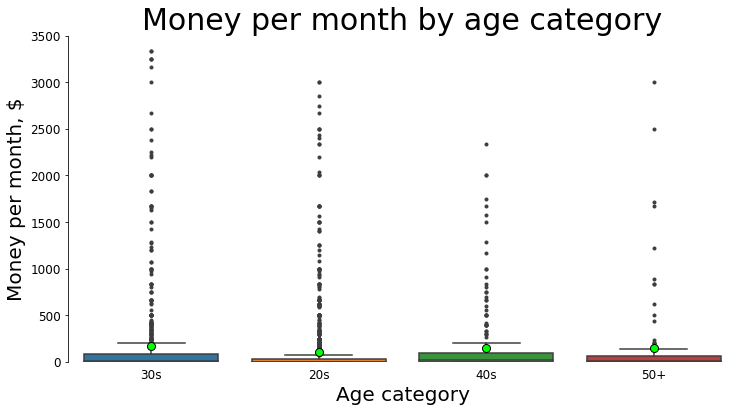

In [36]:
# Recomputing and removing the outliers with `MoneyPerMonth` equal 
# or higher than $3,500
above_3500_outliers = usa[usa['MoneyPerMonth']>=3500]
usa = usa.drop(above_3500_outliers.index)

# Recomputing the average values by age category and reconstructing box plots
find_mean_by_categories(df=usa,
                        column='Age_cat', 
                        cat_name='age category',
                        categories=['20s', '30s', '40s', '50+'])
find_median_by_categories(df=usa,
                        column='Age_cat', 
                        cat_name='age category',
                        categories=['20s', '30s', '40s', '50+'])
create_box_plot(df=usa,
                column='Age_cat', 
                string='0',
                title='Money per month by age category',
                xlabel='Age category')

Now, let's deal with the extreme outliers related to the respondents 50+ y.o:

In [37]:
# Isolating the outliers for the respondents 50+ y.o. paid $1,000+/month
after_50_outliers = usa[(usa['MoneyPerMonth']>=1000)&(usa['Age_cat']=='50+')]
after_50_outliers

,Age,AttendedBootcamp,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasChildren,HasDebt,HasFinancialDependents,HasHomeMortgage,HasStudentDebt,HoursLearning,Income,JobRoleInterest,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,MoneyPerMonth,Age_cat
3553,55.0,1.0,United States of America,United States of America,NaN,Not working but looking for work,female,NaN,0.0,0.0,NaN,NaN,15.0,NaN,"Front-End Web Developer, Full-Stack Web Deve...",married or domestic partnership,12000.0,7.0,master's degree (non-professional),Communication and Media Studies,1714.285714,50+
7631,55.0,0.0,United States of America,United States of America,software development and IT,Employed for wages,female,NaN,0.0,0.0,NaN,NaN,NaN,100000.0,Information Security,married or domestic partnership,5000.0,3.0,bachelor's degree,Business Administration and Management,1666.666667,50+
8120,56.0,0.0,United States of America,United States of America,NaN,NaN,male,NaN,1.0,0.0,0.0,0.0,10.0,NaN,"DevOps / SysAdmin, Game Developer, Informati...",divorced,2500.0,1.0,"trade, technical, or vocational training",NaN,2500.000000,50+
13047,60.0,0.0,United States of America,United States of America,NaN,Not working but looking for work,male,NaN,0.0,0.0,NaN,NaN,40.0,NaN,"Full-Stack Web Developer, Front-End Web Deve...",divorced,11000.0,9.0,"trade, technical, or vocational training",NaN,1222.222222,50+
16971,59.0,0.0,United States of America,United States of America,sales,Self-employed business owner,male,1.0,1.0,1.0,1.0,0.0,20.0,95000.0,"Mobile Developer, Full-Stack Web Developer, ...",married or domestic partnership,3000.0,1.0,bachelor's degree,Economics,3000.000000,50+


Again we have the learners who hadn't attended any bootcamp + one learner with an unrealistic (for a bootcamp) proportion of months to hours of learning. Let's drop these rows, recalculate again the average metrics, and reconstruct  box plots:

MEAN for money per month by age category:
 
20s    102.0
30s    166.0
40s    149.0
50+     67.0
Name: MoneyPerMonth, dtype: float64 


MEDIAN for money per month by age category
 
20s     2.0
30s    13.0
40s    19.0
50+     8.0
Name: MoneyPerMonth, dtype: float64 




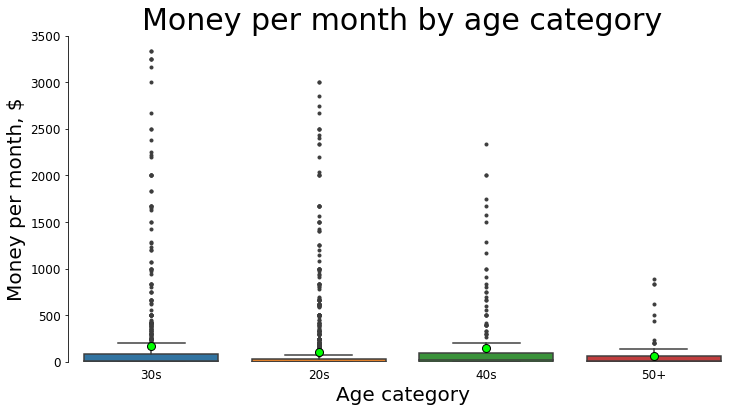

In [38]:
# Removing the outliers for the respondents 50+ y.o.
usa = usa.drop(after_50_outliers.index)

# Recomputing the average values by age category and reconstructing box plots
find_mean_by_categories(df=usa,
                        column='Age_cat', 
                        cat_name='age category',
                        categories=['20s', '30s', '40s', '50+'])
find_median_by_categories(df=usa,
                        column='Age_cat', 
                        cat_name='age category',
                        categories=['20s', '30s', '40s', '50+'])
create_box_plot(df=usa,
                column='Age_cat', 
                string='0',
                title='Money per month by age category',
                xlabel='Age category')

The box plots now are (relatively) much less squeezed, still with a lot of upper outliers and the mean values shifted towards the maximum ones. Probably, we could continue investigating different groups of outliers trying to exclude them. However, we have to take into account the following things:
- The very presence of outliers in such considerable amounts means that there will be *always* people, for one reason or another ready to pay more money than the majority of learners. 


- The remaining upper outliers are not as extreme as those that we removed. 


- Finally, whether a value is an outlier or not, depends directly on the mean and standard deviation metrics. In our case, these 2 metrics are severely influenced by the presence of the respondents who didn't pay anything for their learning, or who paid very few. 

As for the last point, let's do the same exercise as we did in the chapter on *Finding the Best Markets by Country*: remove the rows where the respondents paid less than $10:

Overall number of potential clients:			      2558
Number of potential clients ready to pay more than $10/month: 1130 


MEAN for money per month by age category:
 
20s    279.0
30s    315.0
40s    253.0
50+    137.0
Name: MoneyPerMonth, dtype: float64 


MEDIAN for money per month by age category
 
20s    60.0
30s    80.0
40s    75.0
50+    62.0
Name: MoneyPerMonth, dtype: float64 


+-----+--------------------+--------------------+
|     | Absolute frequency | Relative frequency |
+-----+--------------------+--------------------+
| 20s |       501.0        |        44.0        |
| 30s |       424.0        |        38.0        |
| 40s |       152.0        |        13.0        |
| 50+ |        53.0        |        5.0         |
+-----+--------------------+--------------------+ 



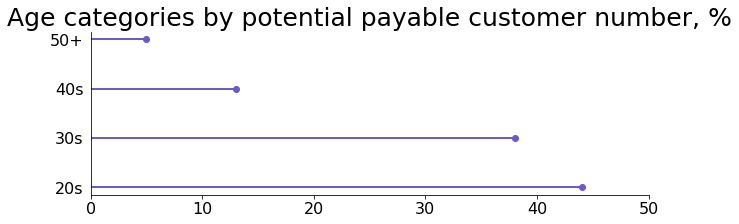

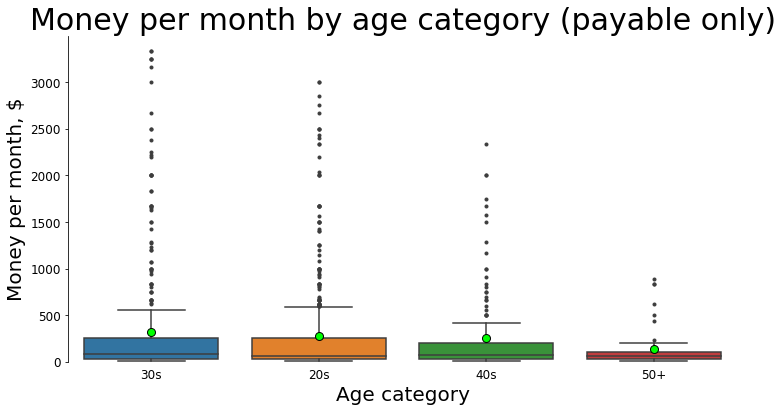

In [39]:
print('Overall number of potential clients:\t\t\t     ', len(usa))

# Considering only the respondents who paid for their learning more than $10/month
usa_exp = usa[usa['MoneyPerMonth']>10.0].copy()

print('Number of potential clients ready to pay more than $10/month:', len(usa_exp), 2*'\n')

# Calculating the average values by age category for the respondents who paid 
# for their learning more than $10/month
find_mean_by_categories(df=usa_exp,
                        column='Age_cat', 
                        cat_name='age category',
                        categories=['20s', '30s', '40s', '50+'])
find_median_by_categories(df=usa_exp,
                        column='Age_cat', 
                        cat_name='age category',
                        categories=['20s', '30s', '40s', '50+'])

# Generating absolute and relative frequencies for the `Age_cat` column
freq_table_ages = create_freq_table(df=usa_exp, 
                  column='Age_cat', 
                  order=['20s', '30s', '40s', '50+'])  


# Pretty-printing the age categories with their corresponding frequencies
print_pretty_table(freq_table_ages.iloc[:4,:])   

# Plotting the age categories with their relative frequencies (in %)
ages_to_plot = freq_table_ages['Relative frequency']
create_stem_plot(height=3, 
                 series=ages_to_plot,
                 title='Age categories by potential payable customer number, %',
                 x_max=50)

# Reconstructing box plots
create_box_plot(df=usa_exp,
                column='Age_cat', 
                string='0',
                title='Money per month by age category (payable only)',
                xlabel='Age category')

We can do  the following observations here:
-  After removing the extreme outliers and all the low payments, all the presented age categories satisfy our threshold of $59 both by the mean (heavily depending on the remaining outliers) and median metrics. 


- The number of our real potential customers older than 40 is very low (18% of all the respondents older than 20) 


- As for the respondents in their 20s and 30s, the difference between the number of potential clients among them is only 6%, while the difference between the mean values of their payments per month is 13% and between the medians – 33%. At this stage, we can decide that the learners in their 30s are more interesting as our potential clients.


-  The distribution features (to the extent of how a box plot can actually display a distribution) for the respondents in their 20s and 30s are very similar. In the second case, however, we observe some higher outliers, which explains the differences in payment statistics per month discussed in the previous point.

The above observations suggest that we remained with practically the same results as we guessed at the beginning of this chapter: in terms of age, our main target is people in their 20s-30s.

## Conclusion
In this project, we investigated the best potential markets (in terms of geography and age categories) to promote an e-learning company specialized in programming courses. Below are our main insights:
- Geographically, the best market for the advertisement campaign are the **USA**, followed with a big gap by **India**. As possible strategies, we suggested:
    - advertising both in the USA and India (91% and 9% of the advertising budget correspondingly, based on the percentage of potential clients),
    - advertising only in the USA.
- In terms of age, our main target audience is represented by **people in their 20s-30s**.
-  We should send these results to the company's marketing team and let them use their domain knowledge to make the best decision.